# Assignment 6: GMM for realtime datapoints

In [22]:
#Libraries required for my code to run
from GMMlibrary import GaussianMixture
#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


# Image Segmentation

Image segmentation is the process of partitioning an image into multiple segments. Image segmentation is typically used to locate objects and boundaries in images.

There are many other applications where Image segmentation is transforming industries:

* Traffic Control Systems
* Self Driving Cars
* Locating objects in satellite images


### Image Segmentation using GMM

In [23]:
from PIL import Image  # To use this PILLOW package, pip install Pillow==2.2.2

array([[[  3, 195, 255],
        [  3, 195, 255],
        [  3, 195, 255],
        ...,
        [  1, 173, 235],
        [  0, 175, 235],
        [  0, 175, 235]],

       [[  2, 195, 254],
        [  2, 195, 254],
        [  2, 195, 254],
        ...,
        [  0, 174, 237],
        [  0, 174, 237],
        [  0, 174, 237]],

       [[  3, 193, 253],
        [  3, 193, 253],
        [  3, 193, 253],
        ...,
        [  0, 176, 238],
        [  2, 174, 238],
        [  2, 174, 238]],

       ...,

       [[169, 190,  95],
        [183, 204, 111],
        [176, 200, 106],
        ...,
        [149, 122, 103],
        [155, 129, 114],
        [158, 132, 117]],

       [[169, 190,  95],
        [186, 207, 114],
        [175, 199, 105],
        ...,
        [150, 123, 104],
        [144, 118, 103],
        [149, 123, 108]],

       [[177, 199, 117],
        [179, 201, 119],
        [180, 202, 119],
        ...,
        [152, 127, 107],
        [157, 128, 114],
        [176, 147, 133]]

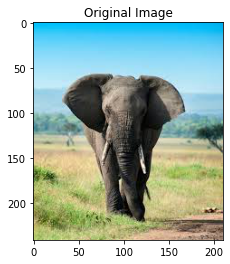

In [24]:

img = np.array(Image.open('Elephant.jpg'));img.shape
plt.title('Original Image')
plt.imshow(img)
img

In [25]:

img_reshapedto2D= img.reshape((-1,3));
X=img_reshapedto2D
#Initial_Centroid=Data.mean(0)
#print(Initial_Centroid)
print('Shape of resized Image:',img_reshapedto2D.shape)
print(img_reshapedto2D)


Shape of resized Image: (50610, 3)
[[  3 195 255]
 [  3 195 255]
 [  3 195 255]
 ...
 [152 127 107]
 [157 128 114]
 [176 147 133]]


...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -802167.4530133803
Iteration:  1   log_likelihood:  -757969.8222560683
Iteration:  2   log_likelihood:  -731047.644557726
Iteration:  3   log_likelihood:  -710056.6931145905
Iteration:  4   log_likelihood:  -696985.4911449032
Iteration:  5   log_likelihood:  -690101.4470920813
Iteration:  6   log_likelihood:  -684218.280016171
Iteration:  7   log_likelihood:  -673431.0526654512
Iteration:  8   log_likelihood:  -668920.4268714604
Iteration:  9   log_likelihood:  -667906.1750190672
Iteration:  10   log_likelihood:  -667071.9788543236
Iteration:  11   log_likelihood:  -665980.5049290519
Iteration:  12   log_likelihood:  -664388.3153358457
Iteration:  13   log_likelihood:  -662101.0931347869
Iteration:  14   log_likelihood:  -660256.1766494426
Iteration:  15   log_likelihood:  -659882.5989481353
Iteration:  16   log_likelihood:  -659798.2882648015
Iteration:  17   log_likelihood:  -659760.6657836124
Iteration:  18   log_likeli

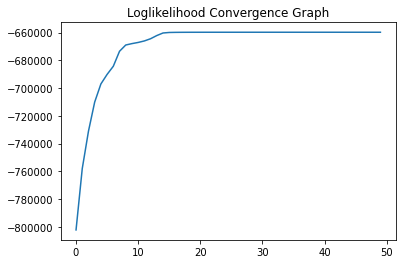

In [26]:
K=4
#Number of Gaussian components
model = GaussianMixture(gaussians=K, n_iters = 50, tol = 0, seed = 4)
fitted_values = model.fit(X)
label_values = model.predict(X)
print(label_values)

(241, 210)
[1 1 1 ... 3 3 3]


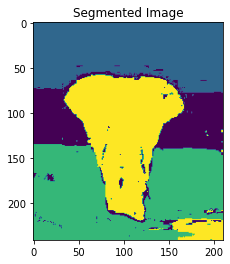

In [27]:

final_segmented_image = label_values.reshape(img.shape[0],img.shape[1]);
print(final_segmented_image.shape)
plt.title('Segmented Image')
plt.imshow(final_segmented_image)
print(label_values)

In [28]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = K, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(X)

print('Likelihood converged or not: ', gmm.converged_)



Likelihood converged or not:  True


Verification wrt Original GMM Algorithm

In [29]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=K,covariance_type='full').fit(X)

In [30]:
segmentation = model.predict(img_reshapedto2D)

(241, 210)
[1 1 1 ... 0 0 0]


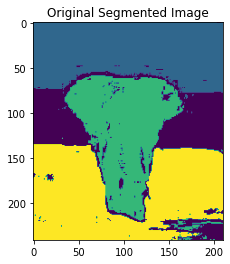

In [31]:
final_segmented_image1 = segmentation.reshape(img.shape[0],img.shape[1]);
print(final_segmented_image1.shape)
plt.title('Original Segmented Image')
plt.imshow(final_segmented_image1)
print(segmentation)

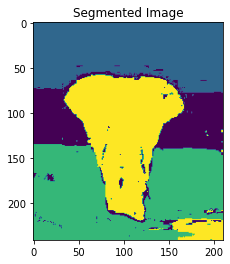

[1 1 1 ... 3 3 3]
[1 1 1 ... 0 0 0]


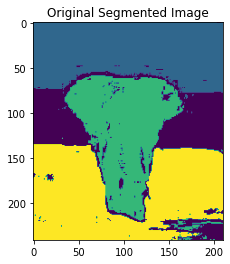

In [32]:
plt.title('Segmented Image')
plt.imshow(final_segmented_image)
plt.show()
print(label_values)

plt.title('Original Segmented Image')
plt.imshow(final_segmented_image1)

print(segmentation)

In [33]:
Classification=[]
ClassificationRate=[]

val_old=[0,1, 2, 3]
val_new=[0,1,3,2]
a = label_values
my_dict = dict(zip(val_old, val_new))
label_values = [my_dict.get(x,x) for x in a]

def accuracy(inp,target,axis=-1):
       
    percentage=(np.sum(inp == target)/len(label_values))*100
    #Classification.append(K)
    #ClassificationRate.append(percentage)
    
    return percentage
accuracy(segmentation,label_values)

96.68840150167951

In [34]:
a

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

Text(0.5, 1.0, 'Histogram')

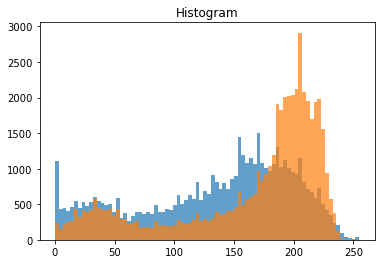

In [35]:
def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([img_reshapedto2D[:, 0], img_reshapedto2D[:, 1]])
plt.title("Histogram")


 Iteration:  1
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -843198.1579816119
Iteration:  1   log_likelihood:  -787854.6394369567
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


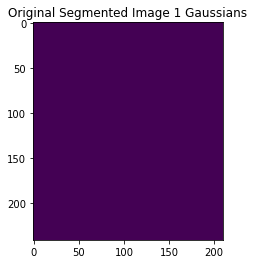

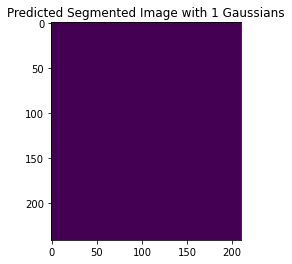


 Iteration:  2
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -799470.4172104058
Iteration:  1   log_likelihood:  -766705.8845575679
Iteration:  2   log_likelihood:  -748773.7464950038
Iteration:  3   log_likelihood:  -738193.1772711365
Iteration:  4   log_likelihood:  -734499.605827084
Iteration:  5   log_likelihood:  -733810.8705702134
Iteration:  6   log_likelihood:  -733343.1983837152
Iteration:  7   log_likelihood:  -732904.8114796191
Iteration:  8   log_likelihood:  -732484.9122366362
Iteration:  9   log_likelihood:  -732190.1481164277
Iteration:  10   log_likelihood:  -732017.7162009343
Iteration:  11   log_likelihood:  -731916.849320518
Iteration:  12   log_likelihood:  -731858.2852595808
Iteration:  13   log_likelihood:  -731821.2746041802
Iteration:  14   log_likelihood:  -731797.0958033452
Iteration:  15   log_likelihood:  -731781.1273588235
Iteration:  16   log_likelihood:  -731770.5326470587
Iteration:  17   log_likelihood:  -731763.4747026342
Iteration: 

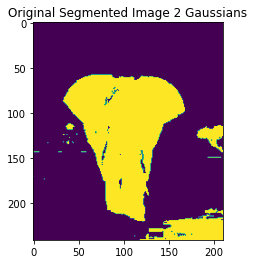

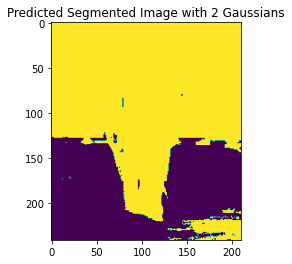


 Iteration:  3
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -812328.2732889229
Iteration:  1   log_likelihood:  -762267.3855392578
Iteration:  2   log_likelihood:  -740207.0176958682
Iteration:  3   log_likelihood:  -731005.5492730518
Iteration:  4   log_likelihood:  -728036.8853857663
Iteration:  5   log_likelihood:  -725871.5799690539
Iteration:  6   log_likelihood:  -724303.3421761758
Iteration:  7   log_likelihood:  -723407.0556552039
Iteration:  8   log_likelihood:  -722721.6894839512
Iteration:  9   log_likelihood:  -722092.6421402816
Iteration:  10   log_likelihood:  -721492.2296123815
Iteration:  11   log_likelihood:  -720916.8529240085
Iteration:  12   log_likelihood:  -720337.5640188429
Iteration:  13   log_likelihood:  -719719.1114281365
Iteration:  14   log_likelihood:  -719124.6937636266
Iteration:  15   log_likelihood:  -718602.1850441934
Iteration:  16   log_likelihood:  -718094.2825072072
Iteration:  17   log_likelihood:  -717470.8942805103
Iteration

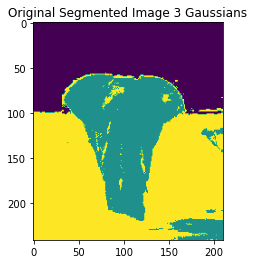

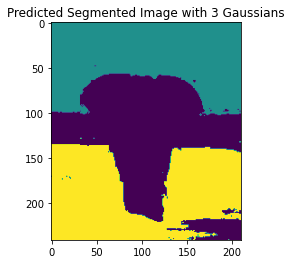


 Iteration:  4
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -802167.4530133803
Iteration:  1   log_likelihood:  -757969.8222560683
Iteration:  2   log_likelihood:  -731047.644557726
Iteration:  3   log_likelihood:  -710056.6931145905
Iteration:  4   log_likelihood:  -696985.4911449032
Iteration:  5   log_likelihood:  -690101.4470920813
Iteration:  6   log_likelihood:  -684218.280016171
Iteration:  7   log_likelihood:  -673431.0526654512
Iteration:  8   log_likelihood:  -668920.4268714604
Iteration:  9   log_likelihood:  -667906.1750190672
Iteration:  10   log_likelihood:  -667071.9788543236
Iteration:  11   log_likelihood:  -665980.5049290519
Iteration:  12   log_likelihood:  -664388.3153358457
Iteration:  13   log_likelihood:  -662101.0931347869
Iteration:  14   log_likelihood:  -660256.1766494426
Iteration:  15   log_likelihood:  -659882.5989481353
Iteration:  16   log_likelihood:  -659798.2882648015
Iteration:  17   log_likelihood:  -659760.6657836124
Iteration: 

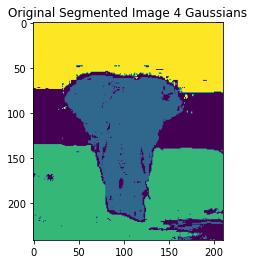

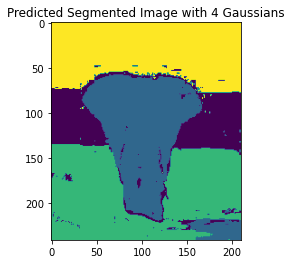


 Iteration:  5
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -800755.6177532511
Iteration:  1   log_likelihood:  -758443.1940319665
Iteration:  2   log_likelihood:  -731656.7603100626
Iteration:  3   log_likelihood:  -708847.0021027293
Iteration:  4   log_likelihood:  -694716.540329302
Iteration:  5   log_likelihood:  -689580.5279026879
Iteration:  6   log_likelihood:  -685113.1186053986
Iteration:  7   log_likelihood:  -674186.3619955112
Iteration:  8   log_likelihood:  -666931.2981718208
Iteration:  9   log_likelihood:  -663131.8301524763
Iteration:  10   log_likelihood:  -660006.1167140398
Iteration:  11   log_likelihood:  -659164.9500859191
Iteration:  12   log_likelihood:  -658735.7464770033
Iteration:  13   log_likelihood:  -658248.9902571661
Iteration:  14   log_likelihood:  -657557.889384037
Iteration:  15   log_likelihood:  -656697.742897517
Iteration:  16   log_likelihood:  -655659.908302058
Iteration:  17   log_likelihood:  -654539.716877517
Iteration:  18

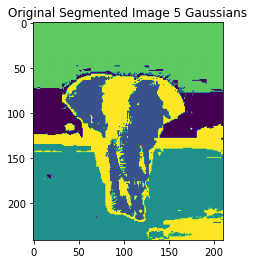

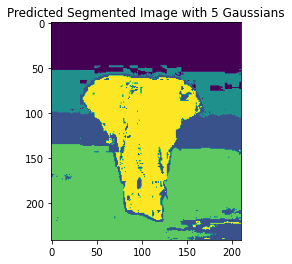

In [36]:
Classification=[]
ClassificationRate=[]

for i in range(1,6):
    
    #Original Values using Inbuilt GMM
    
    print("\n Iteration: ",i)
    
    gmm = mixture.GaussianMixture(n_components = i, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

    gmm.fit(X)
    original = gmm.predict(img_reshapedto2D)
    original_image = original.reshape(img.shape[0],img.shape[1]);
       
    
    
    #Original Values using Inbuilt GMM
    
    model = GaussianMixture(gaussians=i, n_iters = 600, tol = 0.001, seed = 4)
    fitted_values = model.fit(X)
    predicted = np.array(model.predict(X))

       

    if i == 2:
        val_old=[0,1]
        val_new=[0,1]       
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in predicted]    
    

    
    if i == 3:
        val_old=[0,1,2]
        val_new=[0,1,2]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
        
    elif i == 4:
        val_old=[0,1,2, 3]
        val_new=[0,3,2,1]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
        
    elif i ==5:
        val_old=[0,1,2,3,4]
        val_new=[1,0,3,4,2]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
    
    print(original)
    print(np.array(predicted))
   
    predicted_image = np.array(predicted).reshape(img.shape[0],img.shape[1]);
    plt.title(f'Original Segmented Image {i} Gaussians')
    plt.imshow(original_image)
    plt.show()
    
    plt.title(f'Predicted Segmented Image with {i} Gaussians')
    plt.imshow(predicted_image)
    plt.show()
   
 
    
    Classification.append(i)
    ClassificationRate.append(accuracy(original,predicted))
    

[1, 2, 3, 4, 5] [100.0, 59.96838569452677, 32.177435289468484, 96.6804979253112, 7.810709345979055]


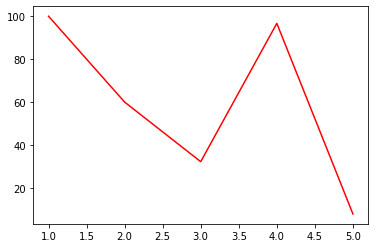

In [38]:
print(Classification,ClassificationRate)

plt.plot(Classification,ClassificationRate,'Red')